In [21]:
# Librerias
import quandl
import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Importar Excels

### Mes 1

In [105]:
mes1 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-1.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes1=mes1.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes1=mes1.dropna(axis=0) #Elimina filas con NaN
t1 = list(mes1.index)


w1 = mes1['Weight (%)']
p1 = mes1['Price']
s1 = mes1['Shares']
a1 = p1*weights*s1 # Valor en dinero de cada ticker

v_etf1 = sum(a1) #Suma de los valores de las acciones
#ETF1 =  v_etf1/17300000 #Valor del ETF1

## Desviación estandar
nav = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/NAV.csv',
                  delim_whitespace=False, thousands=',')
nav1 = nav["NAV per Share"]
desv1 = np.std(nav1)
mean1 = np.mean(nav1)


In [97]:
quandl.ApiConfig.api_key = "My9ygJsz7yTDx_9jcneH"

In [98]:
o = []
for item in reversed(nav1):
    o.append(item)

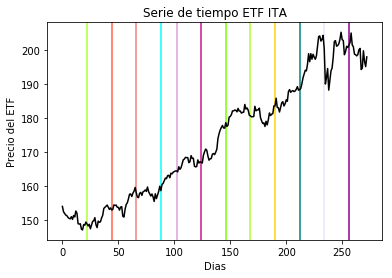

In [208]:
plt.title("Serie de tiempo ETF ITA")
plt.ylabel("Precio del ETF")
plt.xlabel("Dias")
plt.axvline(x=22, c = "greenyellow")
plt.axvline(x=44, c = "tomato")
plt.axvline(x=66, c = "lightcoral")
plt.axvline(x=88, c = "aqua")
plt.axvline(x=102, c = "plum")
plt.axvline(x=124, c = "mediumvioletred")
plt.axvline(x=146, c = "lawngreen")
plt.axvline(x=168, c = "greenyellow")
plt.axvline(x=190, c = "gold")
plt.axvline(x=212, c = "teal")
plt.axvline(x=234, c = "lavender")
plt.axvline(x=256, c = "darkmagenta")

plt.plot(o, c = "k")

### Mes 2

In [106]:
mes2 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-2.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes2=mes2.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes2=mes2.dropna(axis=0) #Elimina filas con NaN
t2 = list(mes2.index)

w2 = mes2['Weight (%)']
p2 = mes2['Price']
s2 = mes2['Shares']
a2 = p2*weights*s2 # Valor en dinero de cada ticker

v_etf2 = sum(a2) #Suma de los valores de las acciones
#ETF2 =  v_etf2/17300000 #Valor del ETF1

nav2 = nav["NAV per Share"].iloc[:250]
desv2 = np.std(nav2)
mean2 = np.mean(nav2)

### Mes 3

In [144]:
mes3 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-3.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes3=mes3.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes3=mes3.dropna(axis=0) #Elimina filas con NaN
t3 = list(mes3.index)

weights = mes3['Weight (%)']
p3 = mes3['Price']
s3 = mes3['Shares']
a3 = p3*weights*s3 # Valor en dinero de cada ticker

v_etf3 = sum(a3) #Suma de los valores de las acciones
#ETF3 =  v_etf3/17300000 #Valor del ETF1

nav3 = nav["NAV per Share"].iloc[:231]
desv3 = np.std(nav3)
mean3 = np.mean(nav3)

### Mes 4

In [145]:
mes4 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-1.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes4=mes4.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes4=mes4.dropna(axis=0) #Elimina filas con NaN
t4 = list(mes4.index)

weights = mes4['Weight (%)']
p4 = mes4['Price']
s4 = mes4['Shares']
a4 = p4*weights*s4 # Valor en dinero de cada ticker

v_etf4 = sum(a4) #Suma de los valores de las acciones
#ETF4 =  v_etf4/17300000 #Valor del ETF1

nav4 = nav["NAV per Share"].iloc[:208]
desv4 = np.std(nav4)
mean4 = np.mean(nav4)

### Mes 5

In [146]:
mes5 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-5.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes5=mes5.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes5=mes5.dropna(axis=0) #Elimina filas con NaN
t5 = list(mes5.index)

weights = mes5['Weight (%)']
p5 = mes5['Price']
s5 = mes5['Shares']
a5 = p5*weights*s5 # Valor en dinero de cada ticker

v_etf5 = sum(a5) #Suma de los valores de las acciones
#ETF5 =  v_etf5/17300000 #Valor del ETF1

nav5 = nav["NAV per Share"].iloc[:187]
desv5 = np.std(nav5)
mean5 = np.mean(nav5)

### Mes 6

In [147]:
mes6 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-6.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes6=mes6.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes6=mes6.dropna(axis=0) #Elimina filas con NaN
t6 = list(mes6.index)

weights = mes6['Weight (%)']
p6 = mes6['Price']
s6 = mes6['Shares']
a6 = p6*weights*s6 # Valor en dinero de cada ticker

v_etf6 = sum(a1) #Suma de los valores de las acciones
#ETF6 =  v_etf6/17300000 #Valor del ETF1

nav6 = nav["NAV per Share"].iloc[:166]
desv6 = np.std(nav6)
mean6 = np.mean(nav6)

### Mes 7

In [148]:
mes7 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-7.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes7=mes7.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes7=mes7.dropna(axis=0) #Elimina filas con NaN
t7 = list(mes7.index)

weights = mes7['Weight (%)']
p7 = mes7['Price']
s7 = mes7['Shares']
a7 = p7*weights*s7 # Valor en dinero de cada ticker

v_etf7 = sum(a7) #Suma de los valores de las acciones
#ETF7 =  v_etf7/17300000 #Valor del ETF1

nav7 = nav["NAV per Share"].iloc[:144]
desv7 = np.std(nav7)
mean7 = np.mean(nav7)

### Mes 8

In [149]:
mes8 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-8.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes8=mes8.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes8=mes8.dropna(axis=0) #Elimina filas con NaN
t8 = list(mes8.index)

weights = mes8['Weight (%)']
p8 = mes8['Price']
s8 = mes8['Shares']
a8 = p8*weights*s8 # Valor en dinero de cada ticker

v_etf8 = sum(a8) #Suma de los valores de las acciones
#ETF8 =  v_etf8/17300000 #Valor del ETF1

nav8 = nav["NAV per Share"].iloc[:123]
desv8 = np.std(nav8)
mean8 = np.mean(nav8)

### Mes 9

In [150]:
mes9 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-9.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes9=mes9.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes9=mes9.dropna(axis=0) #Elimina filas con NaN
t9 = list(mes9.index)

weights = mes9['Weight (%)']
p9 = mes9['Price']
s9 = mes9['Shares']
a9 = p9*weights*s9 # Valor en dinero de cada ticker

v_etf9 = sum(a9) #Suma de los valores de las acciones
#ETF9 =  v_etf9/17300000 #Valor del ETF1

nav9 = nav["NAV per Share"].iloc[:101]
desv9 = np.std(nav9)
mean9 = np.mean(nav9)

### Mes 10

In [151]:
mes10 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-10.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes10=mes10.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes10=mes10.dropna(axis=0) #Elimina filas con NaN
t10 = list(mes10.index)

weights = mes10['Weight (%)']
p10 = mes10['Price']
s10 = mes10['Shares']
a10 = p10*weights*s10 # Valor en dinero de cada ticker

v_etf10 = sum(a10) #Suma de los valores de las acciones
#ETF10 =  v_etf10/17300000 #Valor del ETF1

nav10 = nav["NAV per Share"].iloc[:80]
desv10 = np.std(nav10)
mean10 = np.mean(nav10)

### Mes 11

In [152]:
mes11 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-11.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes11=mes11.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes11=mes11.dropna(axis=0) #Elimina filas con NaN
t11 = list(mes11.index)

weights = mes11['Weight (%)']
p11 = mes11['Price']
s11 = mes11['Shares']
a11 = p11*weights*s11 # Valor en dinero de cada ticker

v_etf11 = sum(a11) #Suma de los valores de las acciones
#ETF11 =  v_etf11/17300000 #Valor del ETF1

mes11.head()

nav11 = nav["NAV per Share"].iloc[:61]
desv11 = np.std(nav11)
mean11 = np.mean(nav11)

### Mes 12

In [153]:
mes12 = pd.read_csv('https://raw.githubusercontent.com/Dianachav/Trading_Lab1/master/ITA_holdings-12.csv',
                   skiprows = [0,1,2,3,4,5,6,7,8,9], index_col = ['Ticker'], delim_whitespace=False, thousands=',')
mes12=mes12.drop(columns = ['Name', 'Asset Class', "Market Value", 'Notional Value', 'Sector', 'SEDOL', 'ISIN', 'Exchange'])
mes12=mes12.dropna(axis=0) #Elimina filas con NaN
t12 = list(mes12.index)

#weights = mes12['Weight (%)']
#p12 = mes12['Price']
#s12 = mes12['Shares']
#a12 = p12*weights*s12 # Valor en dinero de cada ticker

#v_etf12 = sum(a12) #Suma de los valores de las acciones
#ETF12 =  v_etf12/17300000 #Valor del ETF1


nav12 = nav["NAV per Share"].iloc[:39]
desv12 = np.std(nav12)
mean12 = np.mean(nav12)


## Tabla

In [86]:
## Rendimiento de los ETF
Ren1 = np.log(mean12/mean1)
Ren2 = np.log(mean12/mean2)
Ren3 = np.log(mean12/mean3)
Ren4 = np.log(mean12/mean4)
Ren5 = np.log(mean12/mean5)
Ren6 = np.log(mean12/mean6)
Ren7 = np.log(mean12/mean7)
Ren8 = np.log(mean12/mean8)
Ren9 = np.log(mean12/mean9)
Ren10 = np.log(mean12/mean10)
Ren11 = np.log(mean12/mean11)


#DataFrame
des = np.array([desv1,desv2,desv3,desv4,desv5,desv6,desv7,desv8,desv9,desv10,desv11])
r = np.array([Ren1,Ren2,Ren3,Ren4,Ren5,Ren6,Ren7,Ren8,Ren9,Ren10,Ren11])
usd_rate = [0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242, 0.0241]
sharpe = ((((r/100)-usd_rate)/des)*(-1))
beta = 1.21
treynor = (((((r/100)-usd_rate)/beta)/100)*(-1))

series = ["Serie 1", "Serie 2", "Serie 3", "Serie 4", "Serie 5", "Serie 6", "Serie 7",
          "Serie 8", "Serie 9", "Serie 10", "Serie 11"]
tabla = pd.DataFrame(index=series,columns=['Rendimiento %'])
tabla.index.name = "Serie"
tabla['Rendimiento %'] = r
tabla['Desviación %'] = des
tabla['Sharpe'] = sharpe
tabla["Treynor"] = treynor
tabla

,Rendimiento %,Desviación %,Sharpe,Treynor
Serie,,,,
Serie 1,0.135978,17.572573,0.001294,0.000188
Serie 2,0.123758,16.821672,0.001359,0.000189
Serie 3,0.112052,15.799010,0.001442,0.000188
Serie 4,0.097726,14.518251,0.001586,0.000190
Serie 5,0.083792,13.077628,0.001779,0.000192
Serie 6,0.070023,11.618099,0.002014,0.000193
Serie 7,0.055599,10.034371,0.002366,0.000196
Serie 8,0.042430,8.501958,0.002808,0.000197
Serie 9,0.032493,8.222765,0.002904,0.000197


In [108]:
#Función de comparación entre meses
def NotM(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

In [163]:
NotM(t11,t12)

[[], []]

In [ ]:
#Compre y venta de acciones por mes:

mes1 = ['BEAV','TASR']
mes2 = ['AAXN']
mes3 = ['AAXN']
mes4 = ['BEAV','TASR','BEAV','TASR']
mes5 = ['AAXN']
mes7 = ['DGI']

In [252]:
#Mes 1
beav1 = pd.DataFrame(mes1.loc["BEAV"])
cbeav1 = (beav1.iloc[1]*beav1.iloc[2])*0.003

tasr1 = pd.DataFrame(mes1.loc["TASR"])
ctasr1 = (tasr1.iloc[1]*tasr1.iloc[2])*0.003

#Mes 2
aaxn2 = pd.DataFrame(mes2.loc["AAXN"])
caaxn2 = (aaxn2.iloc[1]*aaxn2.iloc[2])*0.003

#Mes 3
aaxn3 = pd.DataFrame(mes3.loc["AAXN"])
caaxn3 = (aaxn3.iloc[1]*aaxn3.iloc[2])*0.003

#Mes 4
beav4 = pd.DataFrame(mes4.loc["BEAV"])
cbeav4 = (beav4.iloc[1]*beav4.iloc[2])*0.003

tasr4 = pd.DataFrame(mes4.loc["TASR"])
ctasr4 = (tasr4.iloc[1]*tasr4 .iloc[2])*0.003

beav4_v = pd.DataFrame(mes4.loc["BEAV"])
cbeav4_v1 = (beav4_v.iloc[1]*beav4_v.iloc[2])*0.003

tasr4_v = pd.DataFrame(mes4.loc["TASR"])
ctasr4_v = (tasr4_v.iloc[1]*tasr4_v.iloc[2])*0.003

#Mes 5
aaxn5 = pd.DataFrame(mes5.loc["AAXN"])
caaxn5 = (aaxn5.iloc[1]*aaxn5.iloc[2])*0.003

#Mes 7
dgi7 = pd.DataFrame(mes7.loc["DGI"])
cdgi7 = (dgi7.iloc[1]*dgi7.iloc[2])*0.003

c = (257188.16, 89671.15, 91758.00,514376.86, 103907.40,0,166452.29,0,0,0,0,0)

array([1223353.3863])

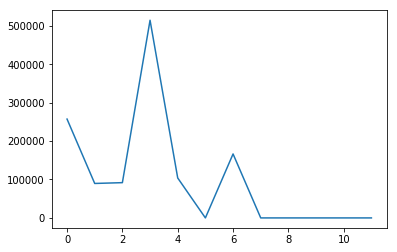

In [278]:
plt.plot(c)

In [282]:
#Descargar datos Quandl

ticker = tick1
date = { 'gte': '2017-03-01', 'lte': '2018-03-01' }
column = { 'columns': ['ticker', 'date', 'Adj_close', 'Open']}

data = quandl.get_table('WIKI/PRICES', qopts = column, ticker = ticker, date = date)# ticker = 'WIKI/AAPL' #'AAPL.US'
data = data.set_index('date') # Poner los índices como las fechas
data

,ticker,adj_close,open
date,,,
2018-03-01,WAIR,9.200000,9.00
2018-02-28,WAIR,8.950000,8.95
2018-02-27,WAIR,8.700000,8.85
2018-02-26,WAIR,8.850000,8.85
2018-02-23,WAIR,8.800000,8.75
2018-02-22,WAIR,8.750000,9.00
2018-02-21,WAIR,8.950000,8.90
2018-02-20,WAIR,8.950000,8.95
2018-02-16,WAIR,8.900000,8.80


In [283]:
mes1

,Weight (%),Price,Shares
Ticker,,,
BA,9.32,176.86,1356276.0
UTX,8.63,112.21,1979767.0
LMT,7.66,267.60,736599.0
GD,6.77,187.20,930601.0
RTN,6.21,152.50,1047397.0
NOC,5.94,237.84,642883.0
TXT,3.29,47.59,1779531.0
LLL,3.28,165.29,511331.0
COL,3.27,97.16,867624.0
